<a href="https://colab.research.google.com/github/mehmetcanayaz/FIN408/blob/main/FIN_408_Downloading_and_Analyzing_Financial_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:red;">FIN 408 - Financial Markets and Institutions</span>

---


# <span style="color:orange;"> Stock Market Analysis and Portfolio Simulation with Python</span>

This guide provides a comprehensive walkthrough on how to download daily stock prices/returns data from Yahoo Finance, including methods to plot, export, and analyze this data. It is divided into two main sections:

**Part 1.** **<span style="color:green;">Data Retrieval and Visualization</span>**: Learn how to obtain stock market data and visualize it effectively. This part covers how to fetch daily stock prices or returns from Yahoo Finance and includes detailed steps to plot and export these datasets.

**Part 2.** **<span style="color:blue;">Portfolio Simulation</span>**: This section delves into the simulation of portfolio weights for a chosen group of stocks. Through these simulations, you can estimate optimal portfolio allocations and understand the dynamics of different stock combinations.

For those interested in deepening their Python programming skills and setting up necessary tools like Python and Jupyter Notebook, here are some helpful resources:

- **<span style="color:purple;">Install Python on Your PC/Mac</span>**: Get Python up and running on your computer. Watch this tutorial for guidance: [How to Install Python](https://youtu.be/YYXdXT2l-Gg).

- **<span style="color:red;">Install Jupyter Notebook</span>**: Learn how to set up Jupyter Notebook, a powerful tool for interactive coding and data analysis. Follow this tutorial: [Setting Up Jupyter Notebook](https://youtu.be/5mDYijMfSzs).

- **<span style="color:magenta;">Install Necessary Packages</span>**: Understand how to install various Python packages that are essential for stock market analysis and other tasks. Here's a helpful guide: [Installing Python Packages](https://youtu.be/Z_Kxg-EYvxM).

Feel free to explore these links and other publicly available resources online for a more comprehensive understanding of Python programming and its applications in finance. Feel free to replicate, utilize, or distribute the code as per your needs!

# <span style="color:orange;">Part 1 - Data Retrieval and Visualization</span>

In [36]:
#import necessary packages

#yahoo finance package
import yfinance as yf

#package for data frames
import pandas as pd
import pandas_datareader as dr

#package for time-related analyses
import datetime as dt

#package for plotting
import matplotlib.pyplot as plt
from matplotlib import style

#use the local directory if needed.
#If you run this code in Colab, your output files will be saved on the LHS under "Files"
dir = "D:/"


In [37]:
print(" ******   Hello world! ****** ")

 ******   Hello world! ****** 


In [43]:
############# Download data for IBM from Yahoo Finance #############
print(" \n ******   Download data from Yahoo Finance ****** \n ")

#create a data frame.
df = yf.download('IBM', start="2014-01-01", end="2019-01-01")

#info about the data frame. Shows varaibles along with size and dimensions.
print("****** Information on the IBM Data. ****** \n")
df.info()



#Export data to Excel
df.to_csv('ibm.csv')

#Print the closing price of IBM within the sampling period.
print("****** Show the IBM Data. ****** \n")
print(df)
#Print the closing price of IBM within the sampling period.
print("****** Only show the closing price. ****** \n")
print(df['Close'])

 
 ******   Download data from Yahoo Finance ****** 
 
[*********************100%%**********************]  1 of 1 completed
****** Information on the IBM Data. ****** 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2014-01-02 to 2018-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB
****** Show the IBM Data. ****** 

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-01-02  178.977051  179.158707  177.055450  177.370941  116.571365   
2014-01-03  177.657745  179.110901  177.151047  178.432129  117.268768   
2014-

 
 ******  END OF download data from Yahoo Finance ****** 
 


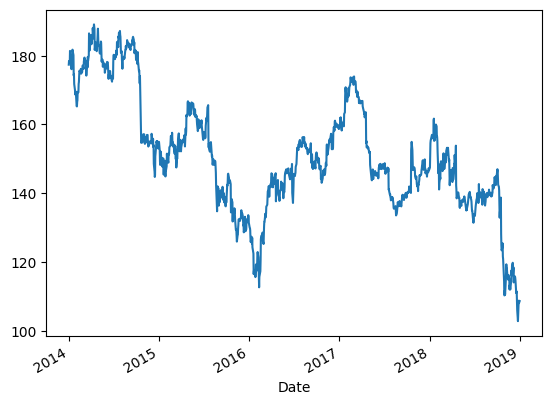

In [44]:
#plot the data
myplot = df['Close'].plot()

#save the figure
plt.savefig('ibmplot.png')

print(" \n ******  END OF download data from Yahoo Finance ****** \n ")

############# END OF download data for a single stock from Yahoo Finance #############

 
 ******   Download data for multiple stocks from Yahoo Finance ****** 
 
[*********************100%%**********************]  3 of 3 completed
            Adj Close                            Close                        \
                 AAPL         GM         KO       AAPL         GM         KO   
Date                                                                           
2014-01-02  17.318731  31.262808  29.837292  19.754642  40.950001  40.660000   
2014-01-03  16.938314  30.209261  29.690529  19.320715  39.570000  40.459999   
2014-01-06  17.030676  30.842928  29.551100  19.426071  40.400002  40.270000   
2014-01-07  16.908878  30.690229  29.639156  19.287144  40.200001  40.389999   
2014-01-08  17.015957  30.858175  29.308935  19.409286  40.419998  39.939999   
...               ...        ...        ...        ...        ...        ...   
2018-12-24  35.232254  30.313862  39.630634  36.707500  32.369999  45.959999   
2018-12-26  37.713360  31.390818  40.475662  39.292500  

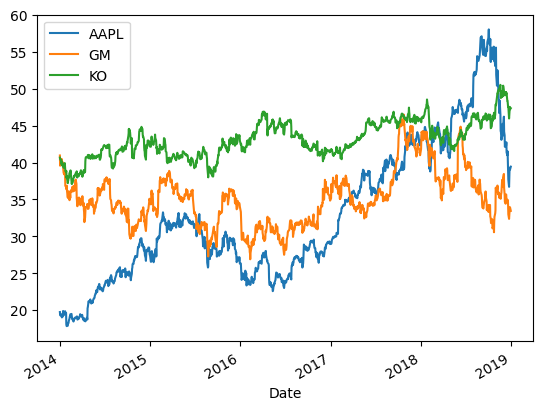

In [45]:
############# download data for multiple stocks from Yahoo Finance #############
print(" \n ******   Download data for multiple stocks from Yahoo Finance ****** \n ")

tickers = ["AAPL","GM", "KO"]

df = yf.download(tickers, start="2014-01-01", end="2019-01-01")

#output to the terminal
print(df)
print(df['Close'])

#Export data to Excel
closingprices = df['Close']
closingprices.to_csv('multiplestocks.csv')

#plot the data
myplot = df['Close'].plot()
#save the figure
plt.savefig('multiplestocks.png')

# Assuming 'Date' is the name of your datetime column
df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])  # Convert the 'Date' column to datetime
df.set_index('Date', inplace=True)  # Set the 'Date' column as the index

multpl_stock_daily_returns = df['Close'].pct_change()
multpl_stock_monthly_returns = df['Close'].resample('M').ffill().pct_change()

print(multpl_stock_daily_returns.mean())

#correlation
#http://www.stat.yale.edu/Courses/1997-98/101/correl.htm
print(multpl_stock_daily_returns)


#Export data to Excel
multpl_stock_daily_returns.to_csv('multpl_stock_daily_returns.csv')

print(" \n ******  END OF download data from Yahoo Finance ****** \n ")

############# END OF download data for multiple stocks from Yahoo Finance #############




<Figure size 640x480 with 0 Axes>

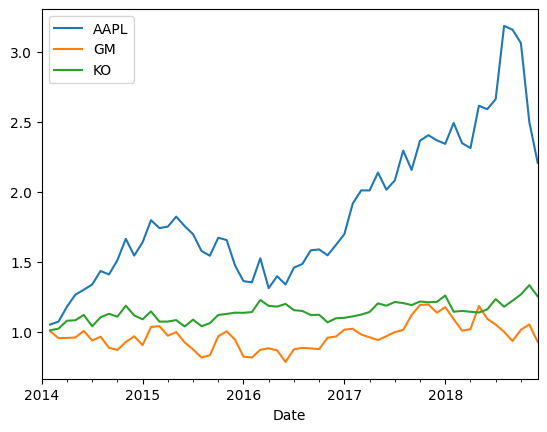

In [47]:
fig = plt.figure()
#Plot compounded returns
(multpl_stock_monthly_returns + 1).cumprod().plot()
plt.show()

<Axes: xlabel='Date'>

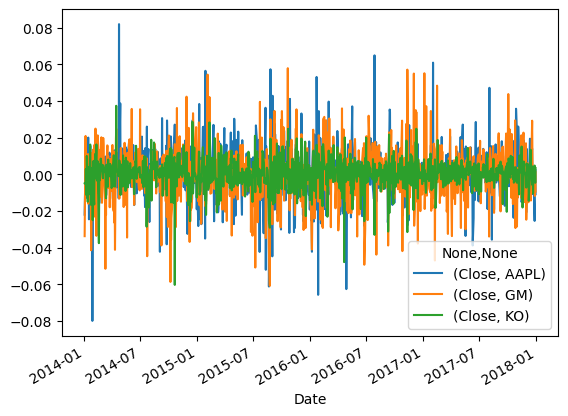

In [48]:
#Plot percent change in stock prices
df.loc["2014-01-01":"2018-01-01", ['Close']].pct_change().plot()

In [49]:
#Plot compounded returns
print("****** Calculate arithmatic average ****** \n")
print(multpl_stock_monthly_returns.mean())

print("****** Calculate correlations ****** \n")
print(multpl_stock_daily_returns.corr())

****** Calculate arithmatic average ****** 

AAPL    0.016075
GM      0.000814
KO      0.004506
dtype: float64
****** Calculate correlations ****** 

          AAPL        GM        KO
AAPL  1.000000  0.290112  0.228052
GM    0.290112  1.000000  0.226631
KO    0.228052  0.226631  1.000000


In [52]:
#Show the data frame
multpl_stock_daily_returns.dropna()

,AAPL,GM,KO
Date,,,
2014-01-03,-0.021966,-0.033700,-0.004919
2014-01-06,0.005453,0.020976,-0.004696
2014-01-07,-0.007152,-0.004951,0.002980
2014-01-08,0.006333,0.005473,-0.011141
2014-01-09,-0.012770,0.001732,-0.005258
...,...,...,...
2018-12-24,-0.025874,-0.018496,-0.033845
2018-12-26,0.070422,0.035527,0.021323
2018-12-27,-0.006490,0.013126,0.012569




# <span style="color:orange;">Part 2 - Portfolio Simulation</span>


In [53]:
#import necessary packages

#yahoo finance
import yfinance as yf

#dataframes
import pandas as pd
import pandas_datareader as dr

#time
import datetime as dt
from time import sleep

#plotting
import matplotlib.pyplot as plt
from matplotlib import style

#lists
import numpy as np


In [55]:
tickers = ["AAPL", "AMZN", "GM"]

#download data
df= yf.download(tickers,  start="2018-01-01", end = "2023-01-01" )

#print data
df.info()
df

[*********************100%%**********************]  3 of 3 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2018-01-02 to 2022-12-30
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  1259 non-null   float64
 1   (Adj Close, AMZN)  1259 non-null   float64
 2   (Adj Close, GM)    1259 non-null   float64
 3   (Close, AAPL)      1259 non-null   float64
 4   (Close, AMZN)      1259 non-null   float64
 5   (Close, GM)        1259 non-null   float64
 6   (High, AAPL)       1259 non-null   float64
 7   (High, AMZN)       1259 non-null   float64
 8   (High, GM)         1259 non-null   float64
 9   (Low, AAPL)        1259 non-null   float64
 10  (Low, AMZN)        1259 non-null   float64
 11  (Low, GM)          1259 non-null   float64
 12  (Open, AAPL)       1259 non-null   float64
 13  (Open, AMZN)       1259 non-null   float64
 14  (Open, GM)         1259 non-null 

Adj Close                             Close             \
                  AAPL       AMZN         GM        AAPL       AMZN   
Date                                                                  
2018-01-02   40.722870  59.450500  37.606449   43.064999  59.450500   
2018-01-03   40.715775  60.209999  38.524128   43.057499  60.209999   
2018-01-04   40.904903  60.479500  39.711697   43.257500  60.479500   
2018-01-05   41.370621  61.457001  39.594734   43.750000  61.457001   
2018-01-08   41.216965  62.343498  39.783672   43.587502  62.343498   
...                ...        ...        ...         ...        ...   
2022-12-23  131.127060  85.250000  33.566917  131.860001  85.250000   
2022-12-27  129.307236  83.040001  33.060883  130.029999  83.040001   
2022-12-28  125.339409  81.820000  32.277027  126.040001  81.820000   
2022-12-29  128.889572  84.180000  33.408161  129.610001  84.180000   
2022-12-30  129.207779  84.000000  33.378391  129.929993  84.000000   

                             High                               Low  \
                   GM        AAPL       AMZN         GM        AAPL   
Date                                                                  
2018-01-02  41.799999   43.075001  59.500000  41.869999   42.314999   
2018-01-03  42.820000   43.637501  60.274502  42.950001   42.990002   
2018-01-04  44.139999   43.367500  60.793499  44.250000   43.020000   
2018-01-05  44.009998   43.842499  61.457001  44.639999   43.262501   
2018-01-08  44.220001   43.902500  62.653999  44.590000   43.482498   
...               ...         ...        ...        ...         ...   
2022-12-23  33.830002  132.419998  85.779999  33.880001  129.639999   
2022-12-27  33.320000  131.410004  85.349998  33.750000  128.720001   
2022-12-28  32.529999  131.029999  83.480003  33.500000  125.870003   
2022-12-29  33.669998  130.479996  84.550003  33.669998  127.730003   
2022-12-30  33.639999  129.949997  84.050003  33.759998  127.430000   

                                        Open                           Volume  \
                 AMZN         GM        AAPL       AMZN         GM       AAPL   
Date                                                                            
2018-01-02  58.525501  41.150002   42.540001  58.599998  41.240002  102223600   
2018-01-03  59.415001  42.200001   43.132500  59.415001  42.209999  118071600   
2018-01-04  60.233002  43.009998   43.134998  60.250000  43.090000   89738400   
2018-01-05  60.500000  43.959999   43.360001  60.875500  44.500000   94640000   
2018-01-08  61.601501  43.520000   43.587502  61.799999  44.040001   82271200   
...               ...        ...         ...        ...        ...        ...   
2022-12-23  82.930000  33.180000  130.919998  83.250000  33.680000   63814900   
2022-12-27  83.000000  33.020000  131.380005  84.970001  33.520000   69007800   
2022-12-28  81.690002  32.520000  129.669998  82.800003  33.320000   85438400   
2022-12-29  82.550003  32.820000  127.989998  82.870003  32.820000   75703700   
2022-12-30  82.470001  33.230000  128.410004  83.120003  33.330002   77034200   

                                
                AMZN        GM  
Date                            
2018-01-02  53890000   6934600  
2018-01-03  62176000  14591600  
2018-01-04  60442000  17298700  
2018-01-05  70894000   9643300  
2018-01-08  85590000  13099600  
...              ...       ...  
2022-12-23  57433700  10619100  
2022-12-27  57284000   9984400  
2022-12-28  58228600   9550900  
2022-12-29  54995900  11634900  
2022-12-30  62401200  11807400  

[1259 rows x 18 columns]

In [56]:
df_close = df['Close']
df_close.corr()

,AAPL,AMZN,GM
AAPL,1.000000,0.802921,0.483834
AMZN,0.802921,1.000000,0.545082
GM,0.483834,0.545082,1.000000


<Axes: xlabel='Date'>

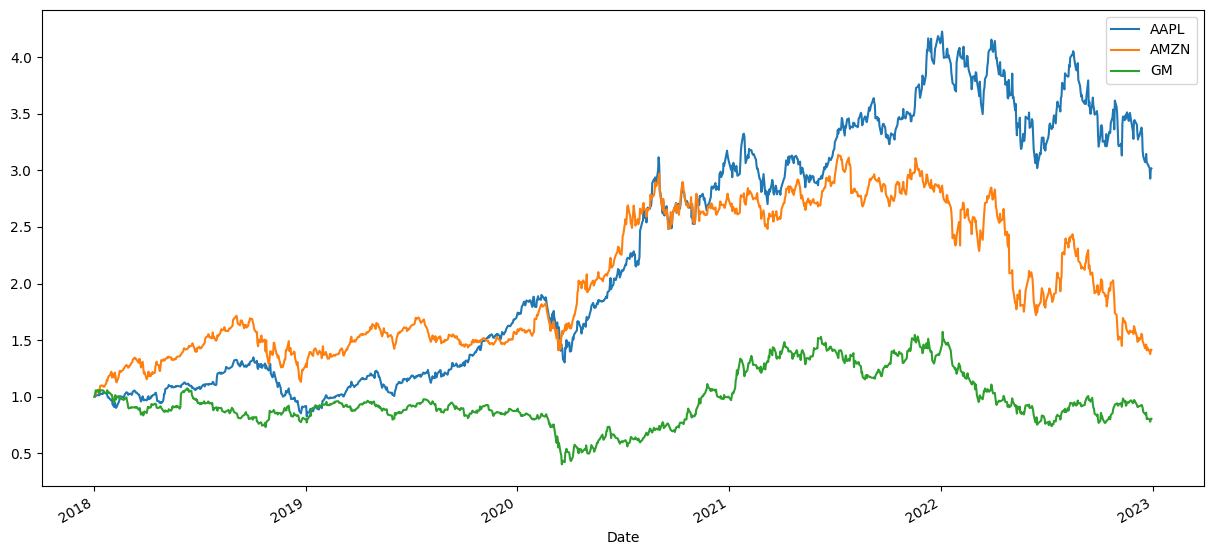

In [57]:
df_close_normed= df_close/df_close.iloc[0]
df_close_normed.plot(figsize=(15,7))

In [58]:
#calculate average returns and variance/covariance
daily_return= df_close.pct_change().dropna()
q1_return= daily_return.mean()*100
q1_cov= daily_return.cov()*100

In [59]:
q1_cov

,AAPL,AMZN,GM
AAPL,0.044520,0.031025,0.023407
AMZN,0.031025,0.050867,0.019148
GM,0.023407,0.019148,0.069884


In [63]:
#This code simulates 10000 portfolios and keeps track of the sharpe rations, returns, risks and weights of these portfolios
pf_returns, pf_volatility, pf_sharpe_ratio, pf_coins_weights=([] for i in range(4))
num_portfolios= 10000
for portfolio in range(num_portfolios):
    weights= np.random.random(3) #change this number when you add/remove stocks from your portfolio
    weights /= np.sum(weights)
    returns = np.dot(weights, q1_return)
    volatility = np.sqrt(np.dot(weights.T, np.dot(q1_cov, weights)))
    sharpe = returns / volatility
    pf_coins_weights.append(weights)
    pf_returns.append(returns)
    pf_volatility.append(volatility)
    pf_sharpe_ratio.append(sharpe)

In [65]:
#10000 portfolios
print(len(pf_volatility))
print(len(pf_returns))
print(len(pf_sharpe_ratio))

# Print a few elements to check the contents
print(pf_volatility[:5])
print(pf_returns[:5])
print(pf_sharpe_ratio[:5])


10000
10000
10000
[0.18563192088595748, 0.1870369884569083, 0.19839288334853042, 0.2216983456238577, 0.1919412288245287]
[0.06364844943274121, 0.05770020253820912, 0.06129249326777139, 0.03779094759895611, 0.06780635369627666]
[0.34287448585873054, 0.3084962125098734, 0.3089450197671388, 0.17046111685052331, 0.3532662269150353]


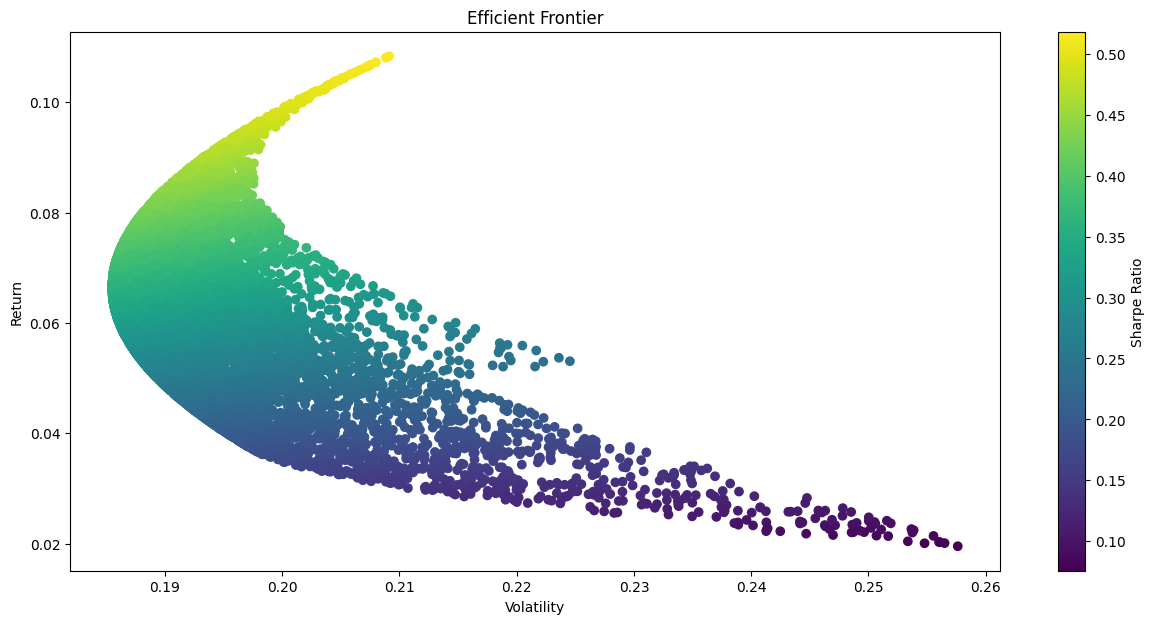

In [66]:
#Plot returns and risks of the 10K portfolios
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


plt.figure(figsize=(15,7))
plt.scatter(x=pf_volatility, y=pf_returns, c= pf_sharpe_ratio, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
sns.set(style='darkgrid')
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()

In [67]:
#the highest sharpe ratio attained
max(pf_sharpe_ratio)

0.5181232053116205

In [68]:
#which portfolio is the best in terms of sharpe ratio?
pf_sharpe_ratio.index(max(pf_sharpe_ratio))

5526

In [69]:
#optimal weights
pf_coins_weights[pf_sharpe_ratio.index(max(pf_sharpe_ratio))]

array([0.97192039, 0.02460448, 0.00347513])

In [71]:
#minimum variance portfolio weights
pf_coins_weights[pf_volatility.index(min(pf_volatility))]

array([0.39805787, 0.33503867, 0.26690345])

In [72]:
#maximum return portfolio weights
pf_coins_weights[pf_returns.index(max(pf_returns))]

array([0.97192039, 0.02460448, 0.00347513])